# Simulações Computacionais Método Magnetotelúrico

##  Séries temporais e espetro de potência 

### Dados da Bacia de Iguatu

Equipamento de aquisição MT1 da EMI (Berkley)

Data de aquisição 2004

Arranjo em L

<h2 align="center">Importando Bibliotecas Importantes <h2> 

In [7]:
import numpy as np
import matplotlib.gridspec as gridspec
import glob
import pandas as pd
import math as math
import pylab
from matplotlib import pyplot as plt
import os
%matplotlib inline

<h2 align="center">  Importando o dado MT </h2> 

In [76]:
ts1 = np.loadtxt(fname='04I001.txt', skiprows=1, usecols= (0,1,2,3,4))

In [77]:
print(ts1)

[[ 6.710815e+00 -4.566619e+00  3.136414e+00 -2.035522e+00  3.608324e+01]
 [ 7.336426e+00 -4.610046e+00  3.078511e+00 -2.191162e+00  3.900734e+01]
 [ 7.446289e+00 -4.640928e+00  2.123111e+00 -2.526855e+00  3.868887e+01]
 ...
 [-1.373291e+00 -5.327080e-01 -2.731093e+00  2.044680e-01 -2.255323e+01]
 [-1.431274e+00 -5.249880e-01 -1.978354e+00 -1.342770e-01 -2.288135e+01]
 [-1.446533e+00 -2.161710e-01 -1.843246e+00  2.136200e-02 -2.284274e+01]]


In [78]:
header=('Ex','Ey', 'Hx', 'Hy', 'Hz')

<h2 align="center">  Plotando séries temporais </h2>  

<h3 align="left"> Importando Canais </h3>

In [79]:
Ex = ts1[:,0]
Ey = ts1[:,1]

Hx = ts1[:,2]
Hy = ts1[:,3]
Hz = ts1[:,4]

CANAIS = [Ex,Ey,Hx,Hy,Hz]

<h3 align='center'>Matlibplot.Gridspec to plot each time serie in a subplot (more in http://matplotlib.org/examples/pylab_examples/demo_tight_layout.html)</h3>

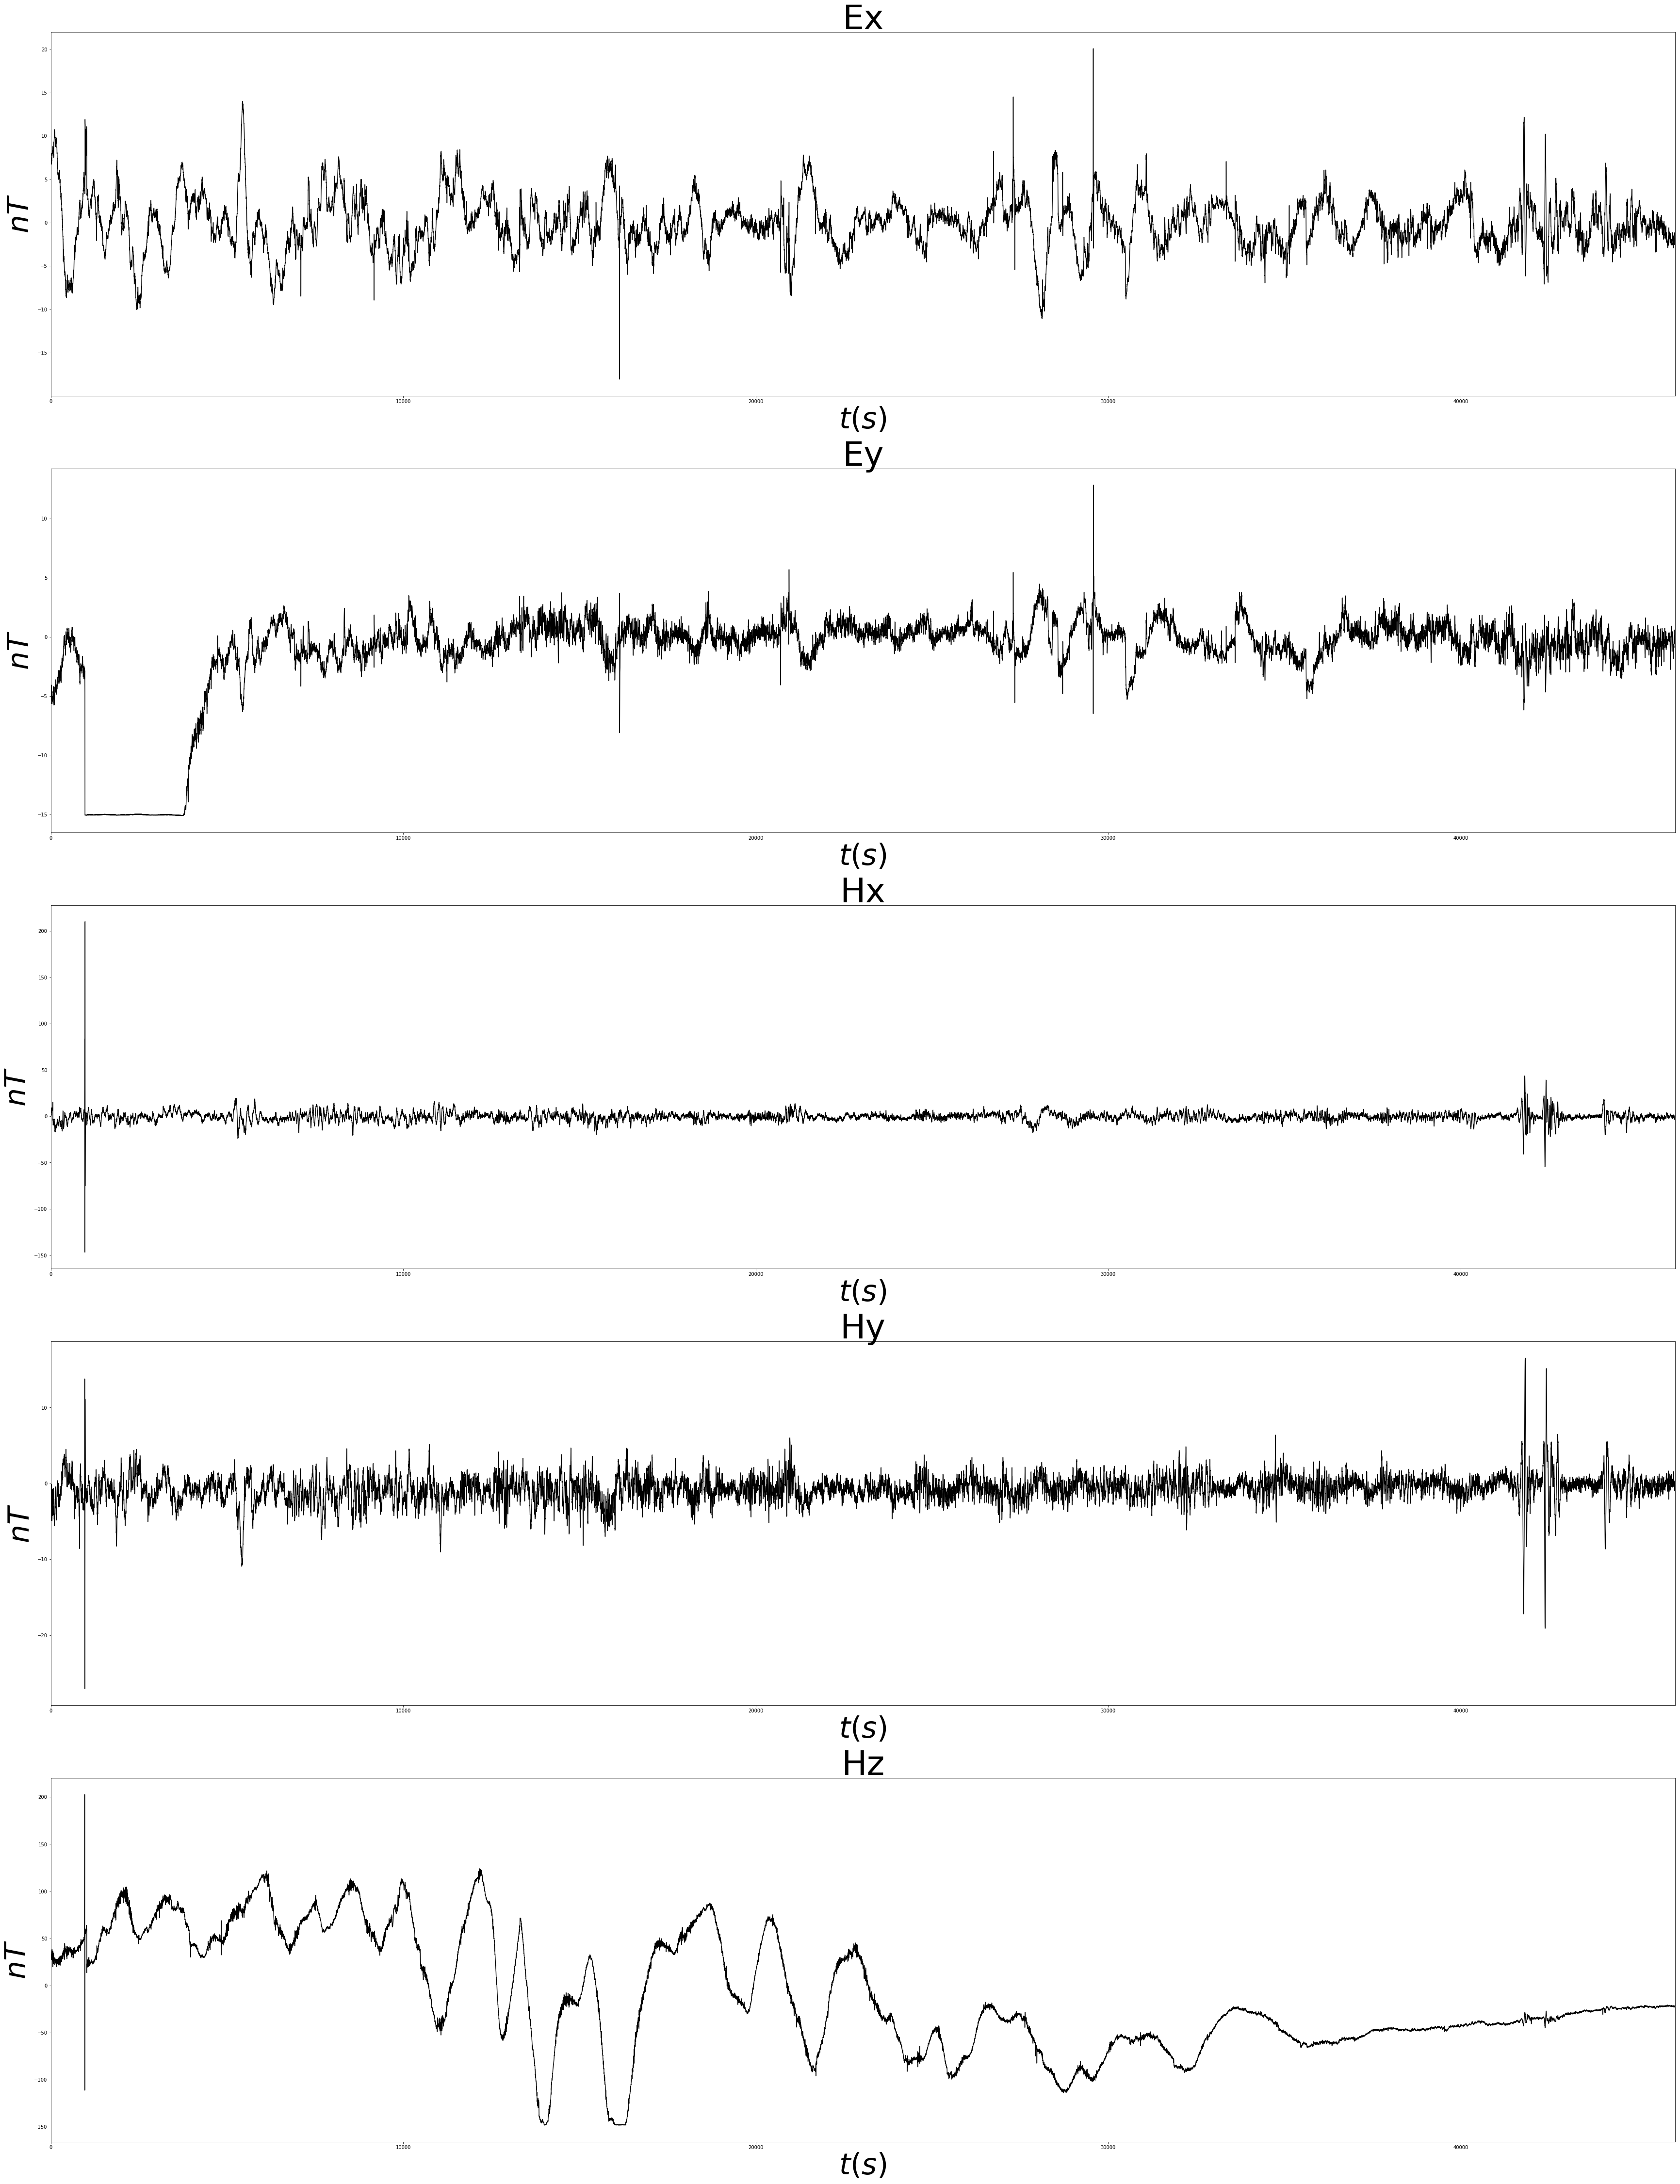

In [89]:
fig = mpl.figure(figsize=(60,80))
gs1 = gridspec.GridSpec(len(CANAIS),1)

for i,j in enumerate(CANAIS):
    ax = fig.add_subplot(gs1[i])
    ax.set_title(header[i],fontsize=70)
    plt.ylabel('$nT$', fontsize=60)
    plt.xlabel('$t(s)$', fontsize=60)
    ax.plot(np.arange(len(CANAIS[0])),j,'k')
    ax.set_xlim(min(np.arange(len(CANAIS[0]))),max(np.arange(len(CANAIS[0]))))

<h2 align='center'> Calculating the spectre to Bx,By,Bz,En,Ee,Es,Ew component  (Discrete Fourier Transform http://docs.scipy.org/doc/numpy/reference/routines.fft.html)</h2>

<h5> Setting the HANNING window, which one maximizes the energy in the main lobe of the window relative to total energy. </h5>

In [5]:
N = len(ADE)
window = np.kaiser(N,6)
window = window/sum(np.convolve(window,window))

<h5> The spectrogram x-axis</h5>

In [6]:
SR = 1 
fr = (1/(SR*N))*(np.arange(N)/2)

<h5> Normalization of the component</h5>

In [7]:
component_data = []
for i,j in enumerate(data):
    component_data.append(j - np.mean(j))

<h5> Linear convolution between the component and the HANNING window</h5>

In [8]:
component_w = [np.convolve(i, window) for i in component_data]

<h5> One-dimensional discrete Fourier Transform of the previous convolution . </h5>

In [9]:
component_wf = [np.fft.fft(i) for i in component_w]

<h5> Linear convolution between the discrete Fourier Transform and his conjugate</h5>

In [10]:
perd = [np.convolve(i,np.conjugate(i)) for i in component_wf]

<h5> Smoothness window size </h5>

In [23]:
nsm = 13
smooth = np.ones(nsm)/nsm

<h5> Shift the convolution between the component and the smothness window to the center of the spectrum. </h5>

In [24]:
spectrum = [np.fft.fftshift(np.convolve(np.fft.fftshift(i),smooth)) for i in perd]

<h2 align='center'>Plotting the Spectrogram</h2>

/home/diogo/programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/home/diogo/programs/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


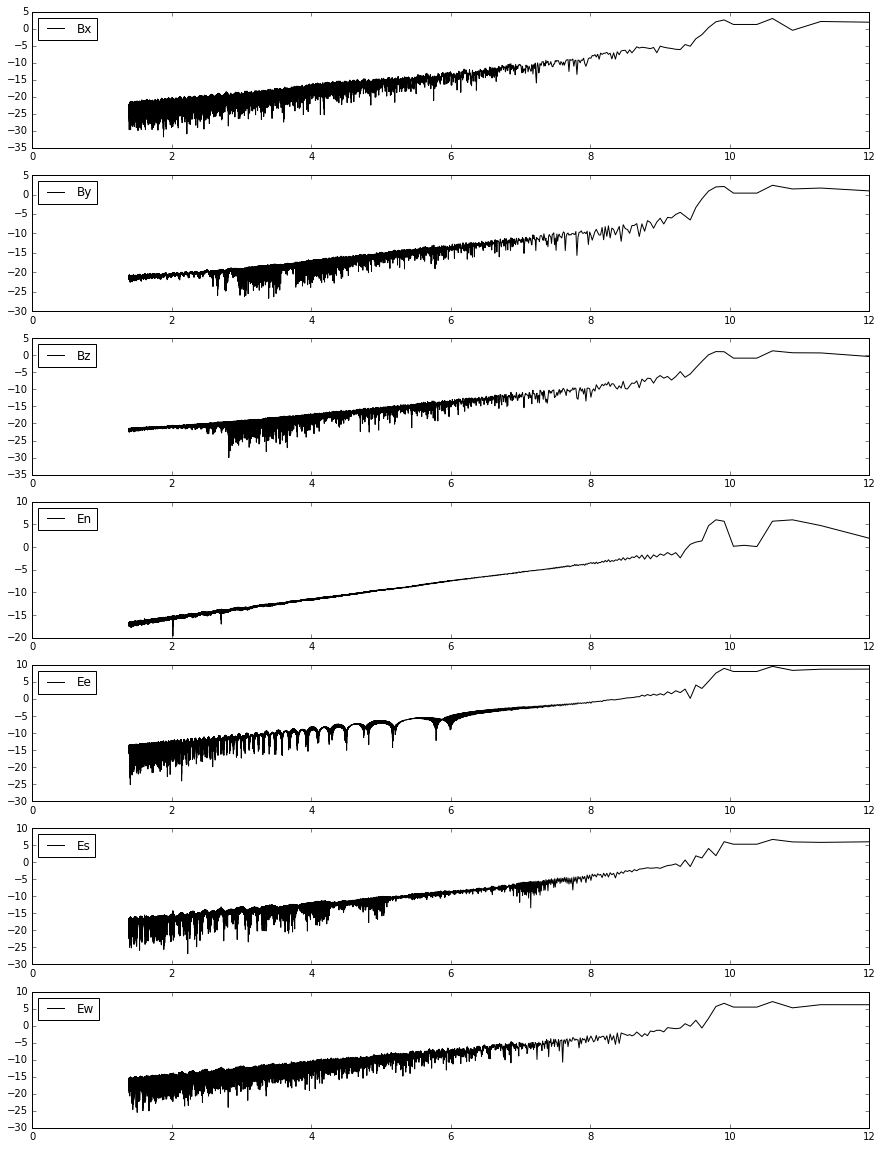

In [25]:
fig = mpl.figure(figsize=(15,20))
gs1 = gridspec.GridSpec(len(spectrum),1)

for i,j in enumerate(spectrum):
    ax = fig.add_subplot(gs1[i])
    ax.plot(np.log(1/fr[:int(N/2)]),np.log(j[:int(N/2)]),'k',label=header[i])
    ax.legend(loc=2)